This note book test the [adapt algorithm](https://adapt-python.github.io/adapt/examples/Sample_bias_example.html) for importance weighting. The algorithm has been incorporated into the gen_data.py script in an easier-to-call format but this notebook provides some visualization of covariate distribution shift as well as weighted sampling across sub-campaigns.

In [ ]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 3

### Test Adapt package

In [3]:
psd = xr.load_dataset('../../data/Processed/psd_coare3p0.nc')

# 77, 69, 83, 78, 87, 72, 71, 68, 67, 73
# split1 = [[69, 83, 78, 87, 72, 71, 68, 67, 73], [77], [77]]
# split2 = [[77, 83, 78, 87, 72, 71, 68, 67, 73], [69], [69]]
# split3 = [[77, 69, 78, 87, 72, 71, 68, 67, 73], [83], [83]]
# split4 = [[77, 69, 83, 78, 68, 67, 73], [87, 72, 71], [87, 72, 71]]
# split5 = [[77, 69, 83, 78, 87, 72, 71, 67, 73], [68], [68]]
# split6 = [[77, 69, 83, 68, 87, 72, 71], [78, 67, 73], [78, 67, 73]]
# split_ensem = [split1, split2, split3, split4, split5, split6]

/ext3/miniconda3/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [4]:
psd

<xarray.Dataset>
Dimensions:  (time: 10079)
Coordinates:
  * time     (time) datetime64[ns] 1996-12-22T19:00:00.288000 ... 2016-04-13T...
Data variables: (12/20)
    taucx    (time) float64 0.1895 0.6395 0.3934 ... 0.07723 0.07373 0.08168
    taucy    (time) float64 0.0333 0.1182 -0.023 ... -0.06492 -0.02255 -0.0589
    hsc      (time) float64 -29.54 -100.4 -60.81 -142.7 ... -5.808 1.075 -13.14
    hlc      (time) float64 -99.11 -180.2 -153.9 -218.3 ... -39.32 -43.95 -109.2
    U        (time) float64 12.14 16.7 16.75 17.0 ... 9.779 8.903 8.239 8.543
    tsea     (time) float64 7.569 11.82 11.86 11.91 ... 11.43 10.9 11.38 12.66
    ...       ...
    lat      (time) float64 50.75 49.39 49.4 49.42 ... -47.65 -47.55 -47.24
    wdir     (time) float64 75.04 68.66 65.81 66.5 ... 284.7 282.9 270.4 283.4
    hlb      (time) float64 -129.8 -175.0 -181.8 -194.0 ... -17.21 -34.88 -27.76
    hsb      (time) float64 -42.07 -81.74 -73.27 -87.61 ... -2.911 3.171 -10.27
    taubx    (time) float64 0.2515 0.5628 0.5641 ... 0.1085 0.08727 0.1017
    tauby    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

#### Based on Ocean Station Papa

In [15]:
from mlflux.gotm import read2010
path = '/home/jw8736/code-5.2.1/cases/ows_papa/'
df = read2010(path, datetimeformat='%Y-%m-%d %H:%M:%S') 
df_ = df.set_index('datetime')
ds = xr.Dataset.from_dataframe(df_)
ds_papa = ds.sel(datetime=slice('2012-01-01','2012-12-31'))

/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

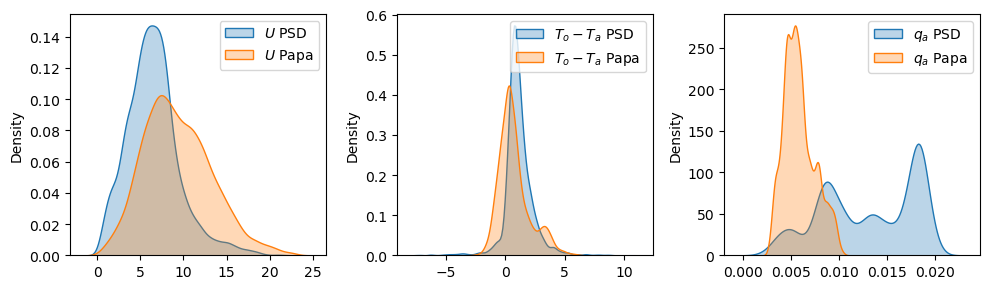

In [41]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=[10,3])

ds = ds_papa

X_target = np.hstack([np.array(((ds.ux)**2+(ds.uy)**2)**0.5).reshape(-1,1), 
               (np.array(ds.sst)-np.array(ds.t)).reshape(-1,1),
               np.array(ds.q).reshape(-1,1),
              ])
X_sample = np.hstack([np.array(psd.U).reshape(-1,1), np.array(psd.tsea-psd.tair).reshape(-1,1), np.array(psd.qair).reshape(-1,1)])


labels = ['$U$', '$T_o-T_a$', '$q_a$']
for i, ax in enumerate(axes):
    sns.kdeplot(X_sample[:,i], fill=True, alpha=0.3, label=labels[i]+' PSD', ax=ax)
    sns.kdeplot(X_target[:,i], fill=True, alpha=0.3, label=labels[i]+' Papa', ax=ax)
    ax.legend()

plt.tight_layout()

/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

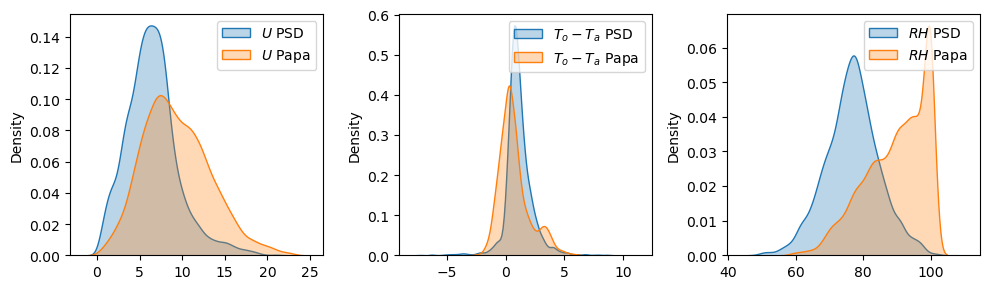

In [43]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=[10,3])

ds = ds_papa

X_target = np.hstack([np.array(((ds.ux)**2+(ds.uy)**2)**0.5).reshape(-1,1), 
               (np.array(ds.sst)-np.array(ds.t)).reshape(-1,1),
               np.array(ds.rh).reshape(-1,1),
              ])
X_sample = np.hstack([np.array(psd.U).reshape(-1,1), np.array(psd.tsea-psd.tair).reshape(-1,1), np.array(psd.rh).reshape(-1,1)])


labels = ['$U$', '$T_o-T_a$', '$RH$']
for i, ax in enumerate(axes):
    sns.kdeplot(X_sample[:,i], fill=True, alpha=0.3, label=labels[i]+' PSD', ax=ax)
    sns.kdeplot(X_target[:,i], fill=True, alpha=0.3, label=labels[i]+' Papa', ax=ax)
    ax.legend()

plt.tight_layout()

In [17]:
from adapt.instance_based import KLIEP

X_target = np.hstack([np.array(((ds_papa.ux)**2+(ds_papa.uy)**2)**0.5).reshape(-1,1), 
               (np.array(ds_papa.sst)-np.array(ds_papa.t)).reshape(-1,1),
               np.array(ds_papa.rh).reshape(-1,1),
              ])
X_sample = np.hstack([np.array(psd.U).reshape(-1,1), np.array(psd.tsea-psd.tair).reshape(-1,1), np.array(psd.rh).reshape(-1,1)])

kliep = KLIEP(kernel="rbf", gamma=[10**(i-3) for i in range(7)], random_state=0)
kliep_weights = kliep.fit_weights(X_sample, X_target)

Cross Validation process...
Parameters {'gamma': 0.001} -- J-score = 0.367 (0.010)
Parameters {'gamma': 0.01} -- J-score = 1.372 (0.031)
Parameters {'gamma': 0.1} -- J-score = 1.919 (0.045)
Parameters {'gamma': 1} -- J-score = 1.367 (0.309)
Parameters {'gamma': 10} -- J-score = -8.612 (0.962)
Parameters {'gamma': 100} -- J-score = -32.828 (0.506)


/ext3/miniconda3/lib/python3.11/site-packages/adapt/instance_based/_kliep.py:492: UserWarning: Not enough centers, only 13 centers found. Maybe consider a different value of kernel parameter.
  warnings.warn("Not enough centers, only %i centers found. Maybe consider a different value of kernel parameter."%len(centers))
/ext3/miniconda3/lib/python3.11/site-packages/adapt/instance_based/_kliep.py:492: UserWarning: Not enough centers, only 13 centers found. Maybe consider a different value of kernel parameter.
  warnings.warn("Not enough centers, only %i centers found. Maybe consider a different value of kernel parameter."%len(centers))
/ext3/miniconda3/lib/python3.11/site-packages/adapt/instance_based/_kliep.py:492: UserWarning: Not enough centers, only 13 centers found. Maybe consider a different value of kernel parameter.
  warnings.warn("Not enough centers, only %i centers found. Maybe consider a different value of kernel parameter."%len(centers))
/ext3/miniconda3/lib/python3.11/site-

Parameters {'gamma': 1000} -- J-score = -36.025 (0.027)


/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

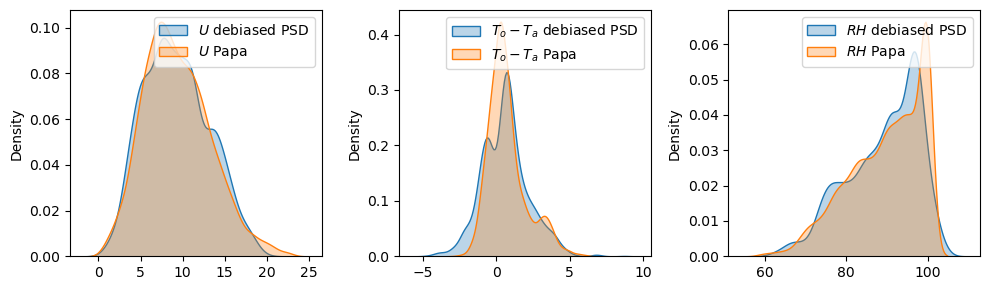

In [45]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=[10,3])

debiasing_index = np.random.choice(len(X_sample), 2000, p=kliep_weights/kliep_weights.sum())

labels = ['$U$', '$T_o-T_a$', '$RH$']
for i, ax in enumerate(axes):
    sns.kdeplot(X_sample[debiasing_index,i], fill=True, alpha=0.3, label=labels[i]+' debiased PSD', ax=ax)
    sns.kdeplot(X_target[:,i], fill=True, alpha=0.3, label=labels[i]+' Papa', ax=ax)
    ax.legend()

plt.tight_layout()

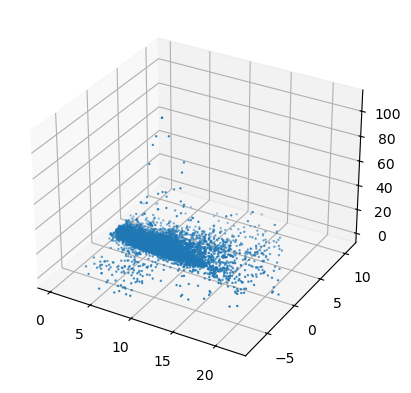

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_sample[:,0], X_sample[:,1], kliep_weights, marker='o', s=0.5)

In [21]:
psd['weight'] = (['time'], kliep_weights/kliep_weights.sum())
psd.to_netcdf('../../data/Processed/psd_coare3p0_wpapa.nc')

# psd = xr.load_dataset('../../data/Processed/psd_coare3p0_wpapa.nc')

/ext3/miniconda3/lib/python3.11/site-packages/xarray/coding/times.py:618: RuntimeWarning: invalid value encountered in cast
  int_num = np.asarray(num, dtype=np.int64)


In [25]:
from mlflux.utils import get_cruise
clist = get_cruise ()
N = psd.sizes['time']
for c in clist:
    print(c['name'])
    c['unweighted'] = psd.where(psd.pcode==c['pcode'],drop=True).sizes['time']/N
    c['weighted'] = psd.where(psd.pcode==c['pcode'],drop=True).weight.sum()
    print('Unweighted %.3f weighted %.3f ' %(c['unweighted'], c['weighted']))

metz
Unweighted 0.304 weighted 0.298 
calwater
Unweighted 0.023 weighted 0.065 
hiwings
Unweighted 0.022 weighted 0.042 
capricorn
Unweighted 0.019 weighted 0.029 
dynamo
Unweighted 0.124 weighted 0.061 
stratus
Unweighted 0.263 weighted 0.097 
epic
Unweighted 0.160 weighted 0.077 
whots
Unweighted 0.034 weighted 0.029 
neaqs
Unweighted 0.020 weighted 0.030 
gasex
Unweighted 0.031 weighted 0.267 


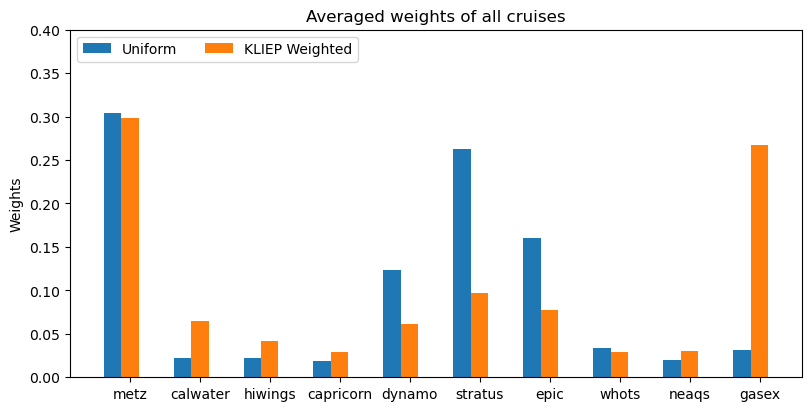

In [37]:
import matplotlib.pyplot as plt
import numpy as np

cnames = [c['name'] for c in clist]
weights = {
    'Uniform': [c['unweighted'] for c in clist],
    'KLIEP Weighted': [c['weighted'] for c in clist],
}

x = np.arange(len(cnames))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=[8,4])

for attribute, measurement in weights.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weights')
ax.set_title('Averaged weights of all cruises')
ax.set_xticks(x + width, cnames)
ax.legend(loc='upper left', ncols=5)
ax.set_ylim(0, 0.4)

plt.show()

#### Based on Global

In [39]:
ds = xr.open_dataset('../../data/Global/GFDL_CM2p6_combined_20200101.nc')
mask = ~np.isnan(ds.sst)
ds_dropna = ds.where(mask.compute(), drop=True)
ds_dropna

<xarray.Dataset>
Dimensions:  (grid_yt: 341, grid_xt: 576)
Coordinates:
  * grid_xt  (grid_xt) float64 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
  * grid_yt  (grid_yt) float64 -80.25 -79.75 -79.25 -78.75 ... 88.75 89.25 89.75
    time     object 0120-01-01 12:00:00
    lon      (grid_xt) float64 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
    lat      (grid_yt) float64 -80.25 -79.75 -79.25 -78.75 ... 88.75 89.25 89.75
Data variables:
    u_ref    (grid_yt, grid_xt) float32 nan nan nan nan ... -1.568 -1.578 -1.588
    v_ref    (grid_yt, grid_xt) float32 nan nan nan nan ... -2.343 -2.327 -2.312
    t_ref    (grid_yt, grid_xt) float32 nan nan nan nan ... -38.58 -38.58 -38.58
    q_ref    (grid_yt, grid_xt) float32 nan nan nan ... 9.661e-05 9.66e-05
    rh_ref   (grid_yt, grid_xt) float32 nan nan nan nan ... 102.9 102.9 102.9
    ps       (grid_yt, grid_xt) float32 nan nan nan ... 1.025e+05 1.025e+05
    wind     (grid_yt, grid_xt) float32 nan nan nan nan ... 3.894 3.894 3.894
    evap     (grid_yt, grid_xt) float32 nan nan nan ... 3.194e-07 3.192e-07
    precip   (grid_yt, grid_xt) float32 nan nan nan ... 1.539e-06 1.539e-06
    sst      (grid_yt, grid_xt) float32 nan nan nan nan ... -1.808 -1.816 -1.794
    usurf    (grid_yt, grid_xt) float32 nan nan nan ... -0.02752 -0.01846
    vsurf    (grid_yt, grid_xt) float32 nan nan nan ... -0.01348 -0.02425
Attributes:
    code_version:  $Name: fre-nctools-bronx-10 $
    filename:      01200101.atmos_daily.tile1.nc
    grid_tile:     N/A
    grid_type:     regular
    history:       fregrid --input_mosaic /ptmp/rds/WGA/MOSAIC/C180_mosaic.nc...
    title:         CM2.6_miniBling

/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

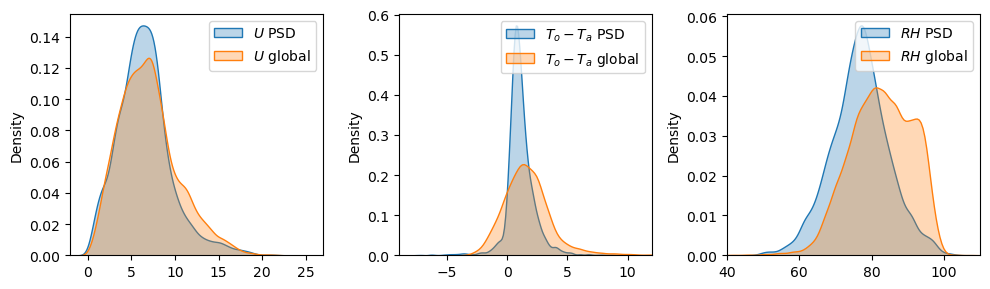

In [77]:
fig, axes = plt.subplots(1, 3, figsize=[10,3])

''' We need to remove iced area! '''
ds = xr.open_dataset('../../data/Global/GFDL_CM2p6_combined_20200101.nc')
mask = ~np.isnan(ds.sst)
ds_dropna = ds.where(mask.compute(), drop=True)
ds = ds_dropna.where(ds_dropna.lat < 60, drop=True).coarsen(grid_xt=2, grid_yt=2, boundary='pad').mean()
# ds = ds.dropna(dim='grid_xt', how='any', subset=['u_ref','v_ref','sst','t_ref','rh_ref']).dropna(dim='grid_yt', how='any', subset=['u_ref','v_ref','sst','t_ref','rh_ref'])
X_target = np.hstack([np.array(((ds.u_ref)**2+(ds.v_ref)**2)**0.5).reshape(-1,1), 
               (np.array(ds.sst)-np.array(ds.t_ref)).reshape(-1,1),
               np.array(ds.rh_ref).reshape(-1,1),
              ])
X_target_clean = X_target[~np.isnan(X_target).any(axis=1)]
X_sample = np.hstack([np.array(psd.U).reshape(-1,1), np.array(psd.tsea-psd.tair).reshape(-1,1), np.array(psd.rh).reshape(-1,1)])

labels = ['$U$', '$T_o-T_a$', '$RH$']
for i, ax in enumerate(axes):
    sns.kdeplot(X_sample[:,i], fill=True, alpha=0.3, label=labels[i]+' PSD', ax=ax)
    sns.kdeplot(X_target_clean[:,i], fill=True, alpha=0.3, label=labels[i]+' global', ax=ax)
    ax.legend()

axes[0].set_xlim([-2,27])
axes[1].set_xlim([-9,12])
axes[2].set_xlim([40,110])
plt.tight_layout()

In [78]:
kliep = KLIEP(kernel="rbf", gamma=[10**(i-3) for i in range(7)], random_state=0)
kliep_weights = kliep.fit_weights(X_sample, X_target_clean)

Cross Validation process...
Parameters {'gamma': 0.001} -- J-score = 0.144 (0.002)
Parameters {'gamma': 0.01} -- J-score = 0.366 (0.011)
Parameters {'gamma': 0.1} -- J-score = 0.573 (0.068)
Parameters {'gamma': 1} -- J-score = -1.529 (0.084)
Parameters {'gamma': 10} -- J-score = -16.646 (0.275)
Parameters {'gamma': 100} -- J-score = -33.294 (0.139)


/ext3/miniconda3/lib/python3.11/site-packages/adapt/instance_based/_kliep.py:492: UserWarning: Not enough centers, only 19 centers found. Maybe consider a different value of kernel parameter.
  warnings.warn("Not enough centers, only %i centers found. Maybe consider a different value of kernel parameter."%len(centers))
/ext3/miniconda3/lib/python3.11/site-packages/adapt/instance_based/_kliep.py:492: UserWarning: Not enough centers, only 16 centers found. Maybe consider a different value of kernel parameter.
  warnings.warn("Not enough centers, only %i centers found. Maybe consider a different value of kernel parameter."%len(centers))
/ext3/miniconda3/lib/python3.11/site-packages/adapt/instance_based/_kliep.py:492: UserWarning: Not enough centers, only 21 centers found. Maybe consider a different value of kernel parameter.
  warnings.warn("Not enough centers, only %i centers found. Maybe consider a different value of kernel parameter."%len(centers))
/ext3/miniconda3/lib/python3.11/site-

Parameters {'gamma': 1000} -- J-score = -36.006 (0.016)


In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=[10,3])

debiasing_index = np.random.choice(len(X_sample), 2000, p=kliep_weights/kliep_weights.sum())

labels = ['$U$', '$T_o-T_a$', '$RH$']
for i, ax in enumerate(axes):
    sns.kdeplot(X_sample[debiasing_index,i], fill=True, alpha=0.3, label=labels[i]+' debiased PSD', ax=ax)
    sns.kdeplot(X_target_clean[:,i], fill=True, alpha=0.3, label=labels[i]+' Papa', ax=ax)
    ax.legend()

plt.tight_layout()